**Install dependencies**

In [1]:
!pip install -q kaggle numpy matplotlib seaborn opencv-python scikit-learn

import os
from google.colab import files
import zipfile

**Upload, Download and Unzip Kaggle API**

In [3]:
print(" Upload your kaggle.json (API token)")
uploaded = files.upload()
if uploaded:
    kaggle_json_filename = list(uploaded.keys())[0]  # Get uploaded filename
    os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
    with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'wb') as f:
        f.write(uploaded[kaggle_json_filename])
    os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)
else:
    raise ValueError("No kaggle.json file uploaded.")


 Upload your kaggle.json (API token)


Saving kaggle (1).json to kaggle (1) (1).json


In [4]:
!kaggle datasets download -d tongpython/cat-and-dog --quiet

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0


In [5]:
#Unzip
with zipfile.ZipFile("cat-and-dog.zip", 'r') as z:
    z.extractall("cat_dog_data")

print(" Dataset downloaded and extracted.")

 Dataset downloaded and extracted.


**Importing required libraries**

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

**Load images**

In [7]:
IMG_SIZE = 64
def load_data(folder, label_name):
    images, labels = [], []
    for fname in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, fname))
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img.flatten())
            labels.append(1 if 'dog' in label_name else 0)
    return images, labels

**checking file structure**

In [10]:
import os

for root, dirs, files in os.walk(".", topdown=True):
    print(root)

.
./.config
./.config/logs
./.config/logs/2025.08.12
./.config/configurations
./cat_dog_data
./cat_dog_data/training_set
./cat_dog_data/training_set/training_set
./cat_dog_data/training_set/training_set/dogs
./cat_dog_data/training_set/training_set/cats
./cat_dog_data/test_set
./cat_dog_data/test_set/test_set
./cat_dog_data/test_set/test_set/dogs
./cat_dog_data/test_set/test_set/cats
./sample_data


In [11]:
train_cats, cats_labels = load_data("cat_dog_data/training_set/training_set/cats", "cat")
train_dogs, dogs_labels = load_data("cat_dog_data/training_set/training_set/dogs", "dog")

test_cats, test_cats_labels = load_data("cat_dog_data/test_set/test_set/cats", "cat")
test_dogs, test_dogs_labels = load_data("cat_dog_data/test_set/test_set/dogs", "dog")

X = np.array(train_cats + train_dogs)
y = np.array(cats_labels + dogs_labels)

print("Total images loaded:", X.shape[0])

Total images loaded: 8005


**Training Model**

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_val = X_val / 255.0

clf = svm.SVC(kernel='rbf', C=10, gamma=0.001)  # better for non-linear image boundaries
clf.fit(X_train, y_train)


SVC(C=10, gamma=0.001)

**Predictions and Confusion Matrix**

Validation Accuracy: 65.96%


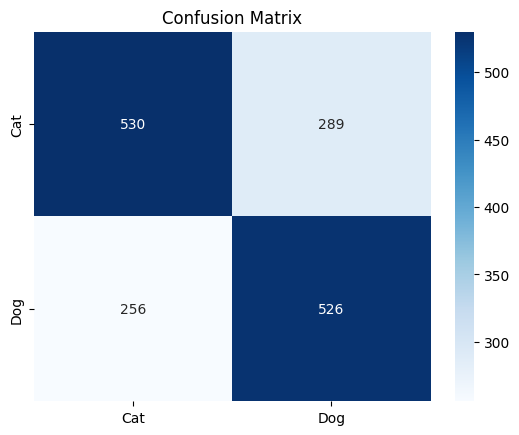

In [18]:
y_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {acc*100:.2f}%")

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat","Dog"], yticklabels=["Cat","Dog"])
plt.title("Confusion Matrix")
plt.show()

Sample predictions visualization

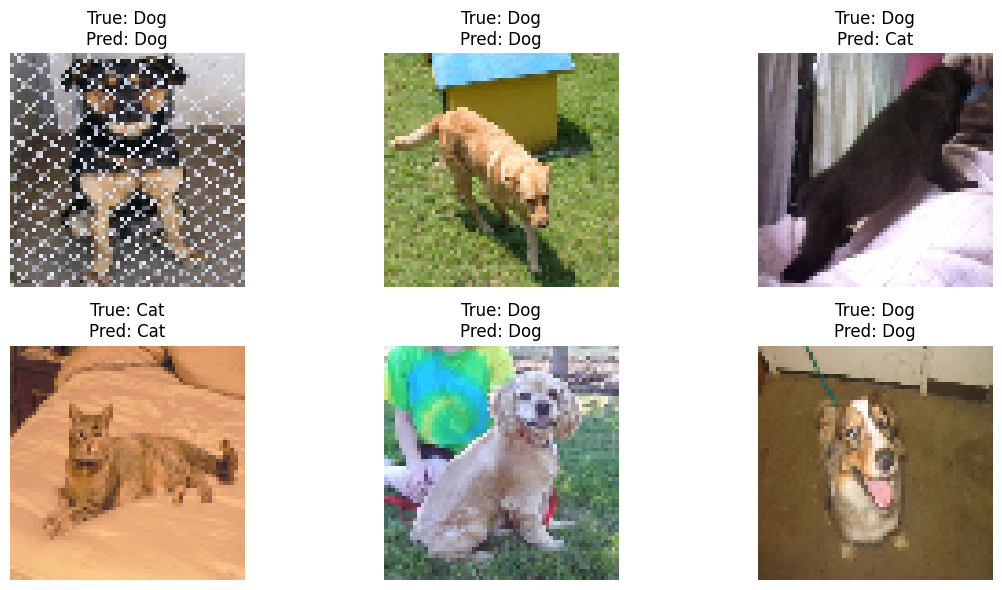

In [19]:
def show_preds(X, y_true, y_pred, num=6):
    plt.figure(figsize=(12, 6))
    for i in range(num):
        img = (X[i].reshape(IMG_SIZE, IMG_SIZE, 3) * 255).astype(np.uint8)  # undo normalization for display
        plt.subplot(2, num//2, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"True: {'Dog' if y_true[i] else 'Cat'}\nPred: {'Dog' if y_pred[i] else 'Cat'}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_preds(X_val, y_val, y_pred)

**Test by adding Dog data only**

In [20]:
#test_cats, test_cats_labels = load_data("cat_dog_data/test_set/test_set/cats", "cat")
test_dogs, test_dogs_labels = load_data("cat_dog_data/test_set/test_set/dogs", "dog")

X_test = np.array(test_cats + test_dogs)
y_test = np.array(test_cats_labels + test_dogs_labels)

print("Test images loaded:", X_test.shape[0])


Test images loaded: 2023


Test Accuracy: 50.02%


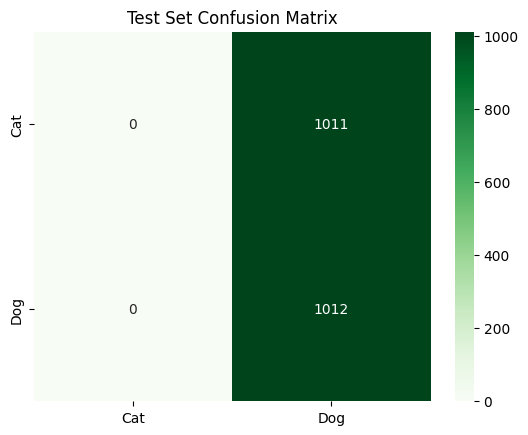

In [21]:
y_test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Confusion Matrix for Test on only dog data to check correct working
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", xticklabels=["Cat","Dog"], yticklabels=["Cat","Dog"])
plt.title("Test Set Confusion Matrix")
plt.show()